In [74]:
import pandas as pd
import numpy as np
import gc
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
def convert_to_number(series,start=0):
    return series.loc[start:].replace(to_replace=r'[,]',value='.', regex=True).astype(float)

In [20]:
df = pd.read_csv('../../data/45/data45.csv')
df['t1(s)'] = convert_to_number(df['t1(s)'])
df['t2(s)'] = convert_to_number(df['t2(s)'])
df.head()

,t1(s),t2(s),l
0,5.5,38.2,"1,6"
1,8.9,79.9,NaN
2,16.0,27.9,NaN
3,8.8,24.9,NaN
4,4.1,48.7,NaN


In [21]:
# t1 up, t2 down
l = 1.6 / (10*100) 
df['v_up [m/s]'] = l / df['t1(s)']
df['v_down [m/s]'] = l / df['t2(s)']
df.head()

,t1(s),t2(s),l,v_up [m/s],v_down [m/s]
0,5.5,38.2,"1,6",0.000291,0.000042
1,8.9,79.9,NaN,0.000180,0.000020
2,16.0,27.9,NaN,0.000100,0.000057
3,8.8,24.9,NaN,0.000182,0.000064
4,4.1,48.7,NaN,0.000390,0.000033


In [40]:
import math
# wzór 19
u = 550 
q_1 = 2 * math.pow(10, -10) * np.sqrt(np.power(df['v_up [m/s]'], 3))/u
q_1.mean()

2.045503257571124e-18

In [41]:
# wzór 14
q_2 = 2 * math.pow(10, -10) * np.sqrt(df['v_up [m/s]'])/u * (df['v_up [m/s]']+df['v_down [m/s]'])
q_2.mean()

2.2872521594760017e-18

In [42]:
true_value = 1.6*math.pow(10,-19)

def relatie_error(_exp, is_val):
    return  np.sqrt(np.power(_exp-is_val,2))/_exp * 100


In [43]:
print(f'q_1 realive error {relatie_error(true_value, q_1.mean())}')
print(f'q_2 realive error {relatie_error(true_value, q_2.mean())}')

q_1 realive error 1178.4395359819525
q_2 realive error 1329.532599672501


In [136]:
width = math.ceil((q_2.max()-q_2.min())/math.pow(10, -20))
bins = np.arange(q_2.min(), q_2.max(),width).shape

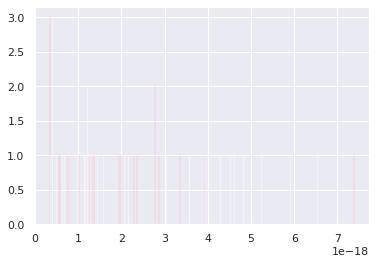

In [153]:
sns.distplot(q_2, bins=width, kde=False, color='r')



In [71]:
relatie_error(true_value, q_2.min()/2)



4.452695906865299

In [142]:
#plt.hist(np.histogram(q_2,weights=np.arange(q_2.min(), q_2.max(),width)))


<ipython-input-165-cd331b69ed2f>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


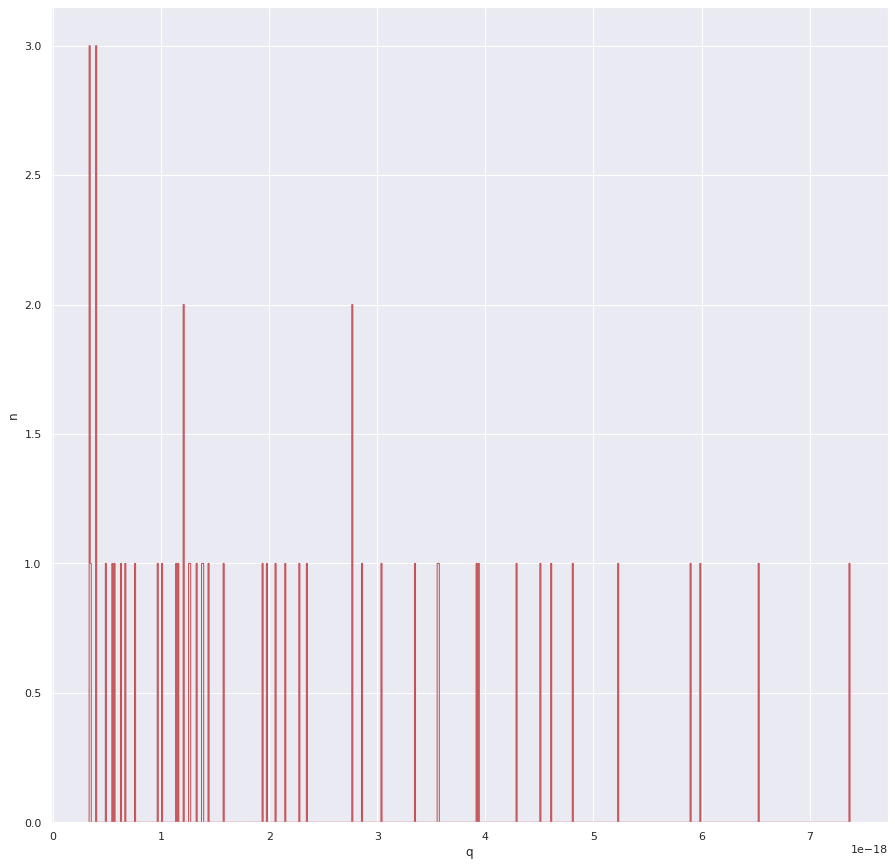

In [165]:
plt.figure(figsize=(15, 15))
ax = plt.hist(q_2, bins=width, color='r',histtype='step', range=[q_2.min(), q_2.max()])
plt.xlabel("q")
plt.ylabel("n")
plt.show()

In [141]:
#sns.distplot(q_2, kde=True, hist=True, hist_kws={"range":[q_2.min(),q_2.min()+math.pow(10, -20)]})


In [229]:
q_2_copy = q_2.sort_values().copy().tolist()
grups = list()
while len(q_2_copy)>0:
    value = min(q_2_copy) + math.pow(10, -20)
    r= list(filter(lambda it: it <= value, q_2_copy))
    grups.append(r)
    q_2_copy = list(set(q_2_copy)-set(r))

In [259]:
results = list()
for i in range(0, len(grups)-1):
    result = -1*(np.array(grups[i]).mean() - np.array(grups[i+1]).mean())
    results.append(result)

In [260]:
val = np.array(results).mean()
relatie_error(true_value, val)

4.683416946010162

In [236]:
grups[1]


[3.458745677245185e-19]

In [238]:
grups[0]

[3.34248626901969e-19, 3.396748103644624e-19, 3.4328586461791723e-19]